In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import time
import requests
import json
import time

In [5]:
income_df = pd.read_csv('cleaned_income_data.csv')
income_df

,Unnamed: 0,Year,First Name,Last Name,Job Title,Income
0,12350,2010,ERNEST L III,AARON,"TECHNICIAN, DEVELOPMENT, IV",65210.90
1,12351,2010,LOIS M.,AARON,TRANSLATOR/INTERP FOR THE DEAF,1891.54
2,12352,2010,GREGORY A.,AARONS,ASSOCIATE PROF IN RES-HCOMP,170724.59
3,12353,2010,CHARLES O,ABAD,"TECHNICIAN,PATIENT DIALYSI, I",45102.64
4,12354,2010,CONCEPCION ABUTI,ABAD,"CLERK, SR/SECRETARY",29320.17
...,...,...,...,...,...,...
362645,548579,2022,THOMAS,ZUST,ELECTR TCHN,68109.00
362646,548580,2022,MARGARET,ZVIRZDIN,PAT RCDS ABSTRACTOR 3,94538.00
362647,548581,2022,JANE,ZWERNEMAN,BLANK AST 3,90684.00
362648,548582,2022,MEGAN,ZYNKIAN,CLIN NURSE 3,117645.00


In [6]:
null_values = income_df.isnull().any()
null_values

Unnamed: 0    False
Year          False
First Name     True
Last Name      True
Job Title      True
Income        False
dtype: bool

We can see from this, we have null values in the columns of First Name, Last Name, and Job Title. While we have removed censored names, we have to incorporate for true null values. We will remove any null first and last names first since they wouldn't correspond with our CAPES dataset anyways.

In [7]:
income_df = income_df.dropna(subset=['First Name', 'Last Name'])
null_values = income_df.isnull().any()
null_values

Unnamed: 0    False
Year          False
First Name    False
Last Name     False
Job Title      True
Income        False
dtype: bool

In [8]:
income_df.shape

(362602, 6)

## Average Income (before splitting by department)

In [9]:
# Get the different types of data in each column to make sure we can get the average value for income
income_df.dtypes

Unnamed: 0      int64
Year            int64
First Name     object
Last Name      object
Job Title      object
Income        float64
dtype: object

In [10]:
# Get the average value of the income column before splitting by department
# average_income = income_df['Income'].mean()
average_income = round(income_df['Income'].mean(), 2)
print("$" + str(average_income))

$72666.74


We can look at the income data and describe how it looks.

In [11]:
income_df['Income'].describe()

count    3.626020e+05
mean     7.266674e+04
std      7.989524e+04
min     -9.390000e+02
25%      2.874000e+04
50%      5.399200e+04
75%      9.161500e+04
max      1.936497e+06
Name: Income, dtype: float64

In [12]:
income_df = income_df.rename(columns={0: 'Index'})
# income_df.head()
income_df.describe()

,Unnamed: 0,Year,Income
count,362602.000000,362602.000000,3.626020e+05
mean,285308.790994,2016.501509,7.266674e+04
std,159787.193478,3.763942,7.989524e+04
min,12350.000000,2010.000000,-9.390000e+02
25%,141827.250000,2013.000000,2.874000e+04
50%,291455.500000,2017.000000,5.399200e+04
75%,427827.750000,2020.000000,9.161500e+04
max,548583.000000,2022.000000,1.936497e+06


In [13]:
print(income_df['Job Title'].unique())
unique_jobs = income_df['Job Title'].unique()
print(len(unique_jobs))

['TECHNICIAN, DEVELOPMENT, IV' 'TRANSLATOR/INTERP FOR THE DEAF'
 'ASSOCIATE PROF IN RES-HCOMP' ... 'COMPENSATION MGR 1'
 'FINANCIAL SVC ANL 5' 'BOAT ENGR PD']
3141


We will get the average of all the incomes from each year and try to plot them on a bar graph to see the general trend of income for each year

In [14]:
average_income_years = income_df.groupby('Year')['Income'].mean().round(2).tolist()
# average_income_years
average_df = income_df.groupby('Year')['Income'].mean().round(2).reset_index()

# Rename the columns for clarity
average_df.columns = ['Year', 'Average Income']
average_df

,Year,Average Income
0,2010,56182.19
1,2011,57857.48
2,2012,61153.29
3,2013,63342.88
4,2014,65722.50
5,2015,67787.33
6,2016,70572.18
7,2017,74144.91
8,2018,76541.99
9,2019,79462.33


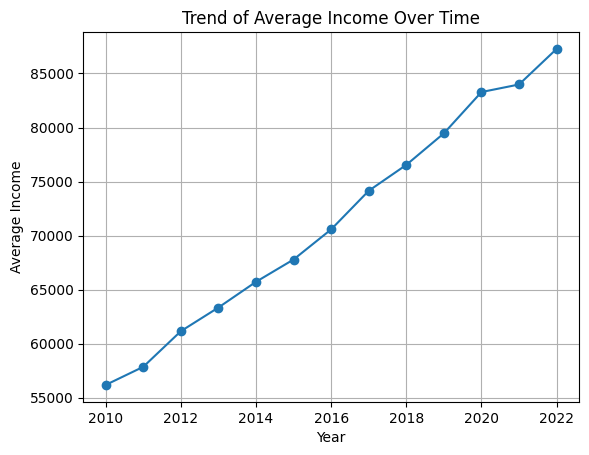

In [15]:
# Plotting trends of income over the 13 years
plt.plot(average_df['Year'], average_df['Average Income'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.title('Trend of Average Income Over Time')
plt.grid(True)
plt.show()

We can take a closer look at the distributions of income over time through a boxplot.

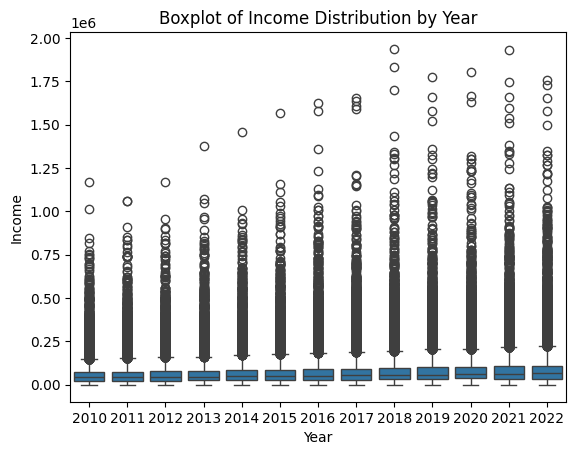

In [23]:
sns.boxplot(x='Year', y='Income', data=income_df)
plt.title('Boxplot of Income Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Income')
plt.show()

Looking at the boxplots over time, we can see that the interquartile range steadily increases over time and the upper whisker significantly increases over time. Of course, there are a lot of upper outliers in each year since this dataset consists of all jobs in UCSD. The top income outliers also seem to increase over time too, peaking at 2018 and 2021.

We will now look at the income distribution using a histogram.

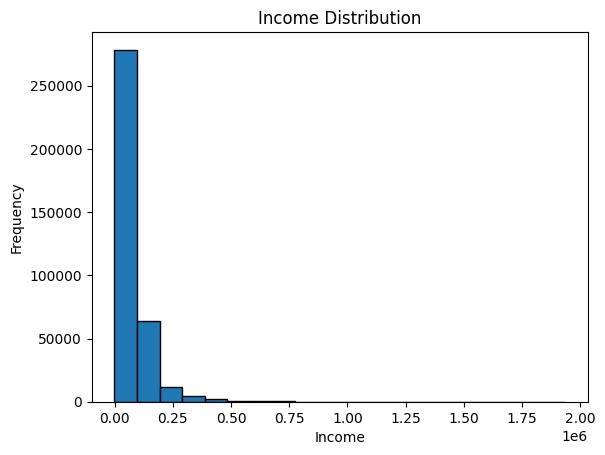

In [16]:
plt.hist(income_df['Income'], bins=20, edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

The distribution heavily skews left, so we should relook at a closer view of the distribution by capping the x-axis to say, $750K.

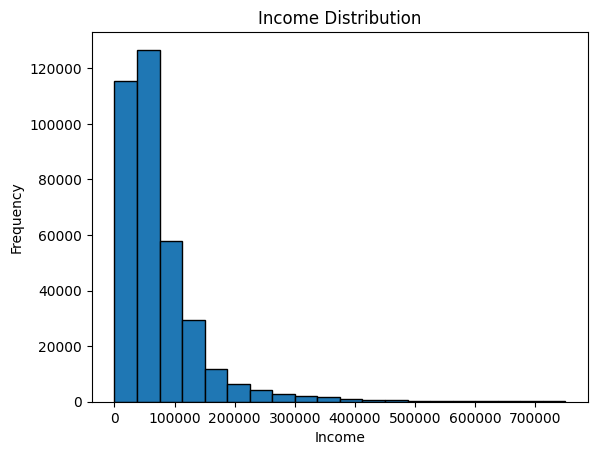

In [17]:
plt.hist(income_df['Income'], bins=20, range=(0, 750000), edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Looking at the distribution, the majority of employees in the dataset make less than \$100K. Because the range is \$750K with 20 bins, each bar represents \$750K/20 = \$37.5K. This means that the mode of this distribution is the bar that represents \$37.5-75K. This distribution makes sense to all employees in UCSD but it is not accurate for the income distribution of all professors and lecturers.

Next, we will take a look at what the top jobs consist of in the income database.

In [18]:
top50_jobs = income_df['Job Title'].value_counts().head(50)
top50_jobs

CLIN NURSE 2                      21343
POSTDOC-EMPLOYEE                  18322
BLANK AST 3                        9969
TEACHER-UNEX-CONTRACT YR           7743
HOSP BLANK AST 3                   5165
BLANK AST 2                        4800
CUSTODIAN SR                       4558
SRA 1                              4476
NURSE PD                           4383
PROF-AY                            4256
CLIN NURSE 3                       3806
SRA 2                              3590
HS ASST CLIN PROF-HCOMP            3202
SRA 3                              3121
HS CLIN PROF-HCOMP                 2810
ADMIN SPEC                         2697
PROF-HCOMP                         2668
HS ASSOC CLIN PROF-HCOMP           2528
MED CTR CUSTODIAN                  2527
ASST PROJ SCIENTIST-FY             2470
MED AST 2                          2356
ADMIN ANL                          2331
LECT-AY-1/9                        2203
NURSE, CLINICAL II                 2149
ASC PHYSCN                         2080


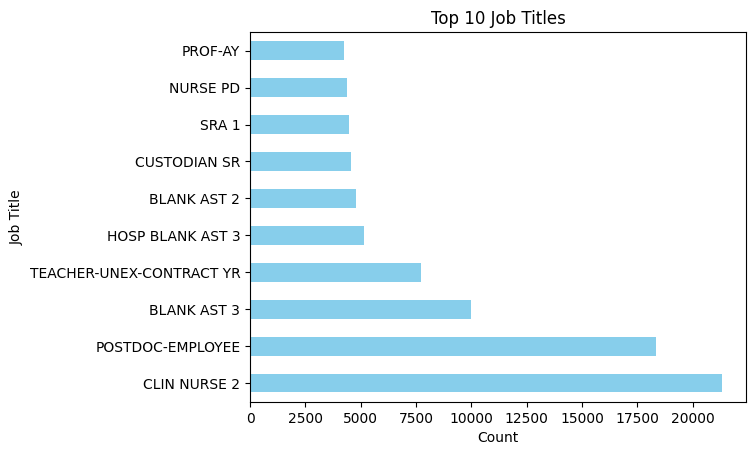

In [19]:
top_jobs = income_df['Job Title'].value_counts().head(10)
top_jobs.plot(kind='barh', color='skyblue')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

It seems that out of the top 10 job titles, the majority of them are related to medical fields and research. Doing a quick google search, SRA and BLANK AST refers to research and assistant titles respectively. Looking at [this website](https://www.ucop.edu/academic-personnel-programs/_files/acad-title-codes/academic-titles-sorted-title-code.pdf) that displays a table of codes to academic titles, we can see that PROF-AY means tenured professor, TEACHER-UNEX-CONTRACT YR means a university extension teacher, and of course POSTDOC-EMPLOYEE refers to postdoc scholars. Postdoc scholars are mainly focused on research rather than teaching. This means that only a small fraction of the income dataset relates to teaching and classes at UCSD.

Now that we can identify which jobs are teaching related, we could look at the income distributions for those job titles.

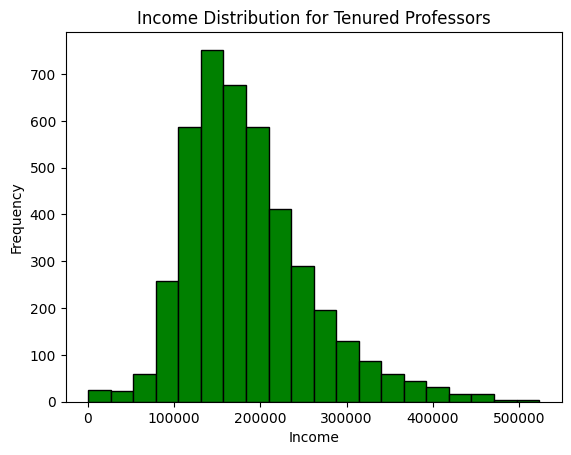

In [20]:
prof_ay_df = income_df[income_df['Job Title'] == 'PROF-AY']
plt.hist(prof_ay_df['Income'], bins=20, color='green', edgecolor='black')
plt.title('Income Distribution for Tenured Professors')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

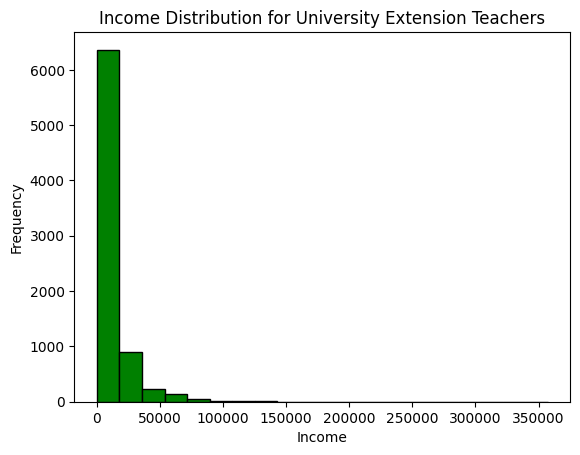

In [21]:
prof_ay_df = income_df[income_df['Job Title'] == 'TEACHER-UNEX-CONTRACT YR']
plt.hist(prof_ay_df['Income'], bins=20, color='green', edgecolor='black')
plt.title('Income Distribution for University Extension Teachers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

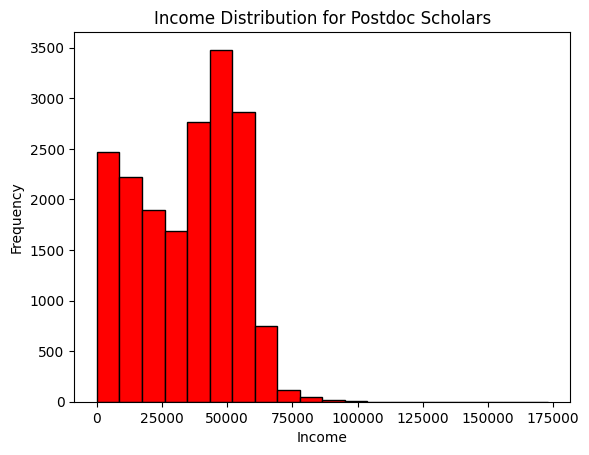

In [22]:
prof_ay_df = income_df[income_df['Job Title'] == 'POSTDOC-EMPLOYEE']
plt.hist(prof_ay_df['Income'], bins=20, color='red', edgecolor='black')
plt.title('Income Distribution for Postdoc Scholars')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

The income distribution for tenured professors is very wide and the range is around \$500K. The mode seems to be around \$150K. This could be due to the fact that a tenured professor's income depends on a lot of factors, such as their length of tenure, years of experience, as well as their quality and quantity of research and teaching.

For university extension teachers, their income distribution is heavily skewed to the left, with the vast majority earning less than \$25K. This may be because extension classes last a shorter time and many of the classes are held online through Zoom.

The income distribution for postdoc scholars is interesting, since there are a wide variety of postdocs earning a range from \$0 to \$60K. After that, the distribution heavily tapers off, with not many postdocs earning more than \$60K and even fewer earning more than \$70K.